# 🩺 Bellabeat Case Study  
## How Can a Wellness Technology Company Play It Smart?

---

## 📊 Project Overview

This project follows the **6-step data analysis process** from the Google Data Analytics Certificate:  
**Ask → Prepare → Process → Analyze → Share → Act**

As part of the **Google Data Analytics Capstone**, I selected the **Bellabeat Case Study** to practice real-world data analysis skills.  
Although I am **not affiliated with Bellabeat**, this project simulates a professional scenario in which a data analyst explores smart device usage data to generate actionable business insights.

The analysis uses the **Fitbit Fitness Tracker dataset** from Kaggle to examine how people engage with wearable fitness devices and how these behaviors can inform marketing and product strategies for Bellabeat.

---

## 1️⃣ Ask

### 🎯 Scenario / Business Task
Bellabeat is a wellness technology company that manufactures smart products designed to help women understand their health patterns.  
For this case study, I assume the role of a **junior data analyst** working with the Bellabeat marketing analytics team to explore **Fitbit usage data** and identify key behavioral trends.

The main goal is to:
- Understand how users engage with their smart devices.  
- Discover patterns in activity, sleep, and daily engagement.  
- Suggest how these findings could guide Bellabeat’s future marketing strategy.

### 👥 Stakeholders
*(Simulated as part of the case study)*  
- **Urška Sršen** – Cofounder & Chief Creative Officer  
- **Sando Mur** – Cofounder & Member of Executive Team  
- **Bellabeat Marketing Analytics Team**

### ❓ Guiding Questions
1. What are some trends in smart device usage?  
2. How could these trends apply to Bellabeat customers?  
3. How could these trends influence Bellabeat’s marketing strategy?

---

## 2️⃣ Prepare

### 📂 Data Source
**Fitbit Fitness Tracker Data (CC0: Public Domain)**  
- Data from **30 Fitbit users**, including activity, steps, sleep, and calories burned.  
- Originally made available on Kaggle by *Mobius*.  
- [Dataset Link](https://www.kaggle.com/datasets/arashnic/fitbit)

### 🧠 ROCCC Evaluation
| Aspect | Evaluation |
|:--|:--|
| **Reliable** | ✅ Collected from actual Fitbit devices |
| **Original** | ⚠️ Public dataset, not owned by Bellabeat |
| **Comprehensive** | ⚠️ Limited to 30 users over ~1 month |
| **Current** | ❌ Data from 2016 |
| **Cited** | ✅ Provided under CC0 license (Public Domain) |

### ⚠️ Limitations
- Small, non-representative sample size.  
- No demographic attributes (e.g., gender, location, or age).  
- Voluntary participation → potential selection bias.  
- Some missing and duplicate data entries were identified and cleaned.

---

## 3️⃣ Process

### 🧹 Data Cleaning Steps
- Cleaned column names and standardized data types.  
- Converted date/time columns to proper formats using `lubridate`.  
- Merged daily activity and sleep datasets by user ID and date.  
- Checked for missing values and duplicates, removing where necessary.  
- Created new date-related features (year, month, weekday/weekend).  

### ✅ Result
A clean, structured dataset combining activity and sleep data — ready for descriptive and exploratory analysis.

---

## 3.1️⃣ Load Libraries and Read Data
In this step, we load all required R packages and read the CSV datasets into data frames.

In [1]:
#========================================================
# 1️⃣ LOAD LIBRARIES AND READ DATA
#========================================================
# 🔹 Load required libraries
library(tidyr)
library(readr)
library(dplyr)
library(lubridate)
library(skimr)
library(janitor)
library(ggplot2)

#========================================================
# 📂 Read the Data Files
#========================================================
fitbit_path <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

daily_activity <- read_csv(file.path(fitbit_path, "dailyActivity_merged.csv"))
sleep_day <- read_csv(file.path(fitbit_path, "sleepDay_merged.csv"))
hourly_steps <- read_csv(file.path(fitbit_path, "hourlySteps_merged.csv"))


# 🔹 Quick look at datasets
head(daily_activity)
head(sleep_day)
head(hourly_steps)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





Attaching package: ‘lubridate’




The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union





Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Rows: 940 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 413 Columns: 5


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 22099 Columns: 3


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


## 3.2️⃣ Data Cleaning / Preprocessing
In this step, we clean column names, fix date formats, and merge datasets.

In [2]:
#========================================================
# 2️⃣ DATA CLEANING / PREPROCESSING
#========================================================
# 🔹 Clean column names for consistency
daily_activity <- clean_names(daily_activity)
sleep_day <- clean_names(sleep_day)
hourly_steps <- clean_names(hourly_steps)

# 🔹 Rename column for clarity
sleep_day <- sleep_day %>% rename(sleep_date = sleep_day)

# 🔹 Convert date/datetime columns to proper formats
daily_activity$activity_date <- mdy(daily_activity$activity_date)
sleep_day$sleep_date <- as.Date(mdy_hms(sleep_day$sleep_date))
hourly_steps$activity_hour <- mdy_hms(hourly_steps$activity_hour)

# 🔹 Split datetime into date and time
hourly_steps <- hourly_steps %>% 
  mutate(activity_date = as.Date(activity_hour),
         activity_time = format(activity_hour, "%H:%M:%S"),
         hour_numeric = hour(activity_hour))  # Extract hour 0–23

# 🔹 Check for missing values
any(is.na(daily_activity))
any(is.na(sleep_day))
any(is.na(hourly_steps))

# 🔹 Merge daily activity and sleep data
merged_data <- daily_activity %>% 
  left_join(sleep_day, by = c("id", "activity_date" = "sleep_date"))

# 🔹 Remove duplicates
cat("Duplicates before distinct():", sum(duplicated(merged_data)), "\n")
merged_data <- distinct(merged_data)
cat("Duplicates after distinct():", sum(duplicated(merged_data)), "\n\n")


[1] FALSE

[1] FALSE

[1] FALSE

Duplicates before distinct(): 3 


Duplicates after distinct(): 0 



## 3.3️⃣ Merge Datasets and Remove Duplicates
Combine daily activity and sleep data, then remove duplicate rows.

In [3]:
#========================================================
# 3️⃣ MERGE DATASETS AND REMOVE DUPLICATES
#========================================================

merged_data <- daily_activity %>% 
  left_join(sleep_day, by = c("id", "activity_date" = "sleep_date"))

# Remove duplicates
cat("Duplicates before distinct():", sum(duplicated(merged_data)), "\n")
merged_data <- distinct(merged_data)
cat("Duplicates after distinct():", sum(duplicated(merged_data)), "\n\n")

Duplicates before distinct(): 3 


Duplicates after distinct(): 0 



## 3.4️⃣ Missing Values Summary
Check which columns have missing data and the percentage of missing values.

In [4]:
#========================================================
# 4️⃣ MISSING VALUES SUMMARY
#========================================================

na_summary <- data.frame(
  Column = colnames(merged_data),
  Missing_Count = colSums(is.na(merged_data)),
  Missing_Percent = round(colSums(is.na(merged_data)) / nrow(merged_data) * 100, 2)
)
print(na_summary)

                                               Column Missing_Count
id                                                 id             0
activity_date                           activity_date             0
total_steps                               total_steps             0
total_distance                         total_distance             0
tracker_distance                     tracker_distance             0
logged_activities_distance logged_activities_distance             0
very_active_distance             very_active_distance             0
moderately_active_distance moderately_active_distance             0
light_active_distance           light_active_distance             0
sedentary_active_distance   sedentary_active_distance             0
very_active_minutes               very_active_minutes             0
fairly_active_minutes           fairly_active_minutes             0
lightly_active_minutes         lightly_active_minutes             0
sedentary_minutes                   sedentary_mi

## 3.5️⃣ Feature Engineering - Date Features
Create new columns for year, month, day, day of week, and type of day (weekday/weekend).

In [5]:
#========================================================
# 5️⃣ FEATURE ENGINEERING - DATE FEATURES
#========================================================

merged_data <- merged_data %>% 
  mutate(
    year = as.numeric(format(activity_date, "%Y")),
    month = as.numeric(format(activity_date, "%m")),
    day = as.numeric(format(activity_date, "%d")),
    day_of_week = weekdays(activity_date),
    day_type = ifelse(day_of_week %in% c("Saturday", "Sunday"), "Weekend", "Weekday")
  )

## 3.6️⃣ Check Extremes & Duplicate Daily Records
Inspect key metrics for extreme values and check for multiple records per user per day.

In [6]:
#========================================================
# 6️⃣ CHECK EXTREMES & DUPLICATES
#========================================================

# Summary of key metrics
summary(merged_data$total_steps)
summary(merged_data$calories)
summary(merged_data$total_minutes_asleep)

# Check if any user has multiple records per day
merged_data %>% 
  group_by(id, activity_date) %>% 
  summarise(count = n(), .groups = "drop") %>% 
  filter(count > 1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    3790    7406    7638   10727   36019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1828    2134    2304    2793    4900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   58.0   361.0   432.5   419.2   490.0   796.0     530 

id,activity_date,count
<dbl>,<date>,<int>



## 4️⃣ Analyze

### 🔍 Main Insights
1. **User Engagement:**  
   Engagement levels vary widely; only a few users log data consistently.  
2. **Activity Patterns:**  
   Users are more active on **weekends**, showing lifestyle-driven habits.  
3. **Activity Classification:**  
   Most users fall into **Sedentary** or **Moderately Active** categories.  
4. **Sleep Logging:**  
   Users who track sleep more frequently tend to have higher activity levels.  
5. **Hourly Activity:**  
   Movement peaks around **7–9 AM** and **5–8 PM**, aligning with daily routines.

---

### 4.1️⃣ User Engagement Overview
Examine user engagement by counting unique days recorded and categorize users based on consistency ratio.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


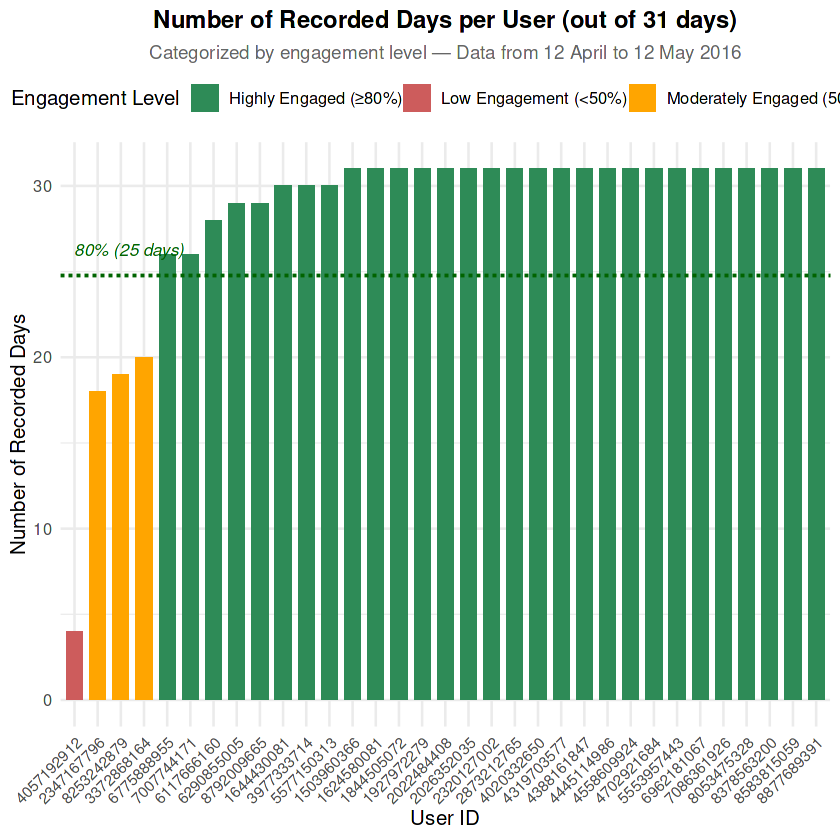

In [7]:
# Overall date range
min_date <- min(daily_activity$activity_date)
max_date <- max(daily_activity$activity_date)
total_possible_days <- as.numeric(difftime(max_date, min_date, units = "days")) + 1

# Count unique days recorded per user
user_engagement_days <- daily_activity %>% 
  group_by(id) %>% 
  summarise(num_of_days_recorded = n_distinct(activity_date))

# Compute consistency ratio and categorize users
user_engagement_days <- user_engagement_days %>% 
  mutate(
    consistency_ratio = round(num_of_days_recorded / total_possible_days, 2),
    engagement_level = case_when(
      consistency_ratio >= 0.8 ~ "Highly Engaged (≥80%)",
      consistency_ratio >= 0.5 ~ "Moderately Engaged (50–79%)",
      TRUE ~ "Low Engagement (<50%)"
    )
  ) %>% 
  arrange(desc(num_of_days_recorded))

# Bar plot: number of recorded days per user
ggplot(user_engagement_days, aes(
  x = reorder(as.factor(id), num_of_days_recorded), 
  y = num_of_days_recorded,
  fill = engagement_level)) +
  geom_col(width = 0.7) +
  scale_fill_manual(values = c(
    "Highly Engaged (≥80%)" = "#2E8B57",
    "Moderately Engaged (50–79%)" = "#FFA500",
    "Low Engagement (<50%)" = "#CD5C5C"
  )) +
  labs(
    title = paste0("Number of Recorded Days per User (out of ", total_possible_days, " days)"),
    subtitle = "Categorized by engagement level — Data from 12 April to 12 May 2016",
    x = "User ID",
    y = "Number of Recorded Days",
    fill = "Engagement Level"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 0.5, size = 11, color = "gray40"),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
    legend.position = "top"
  ) +
  geom_hline(yintercept = 0.8 * total_possible_days, linetype = "dashed", color = "darkgreen", size = 0.8) +
  annotate("text", x = 1, y = 0.8 * total_possible_days + 1.5, 
           label = paste0("80% (", round(0.8*total_possible_days), " days)"), 
           hjust = 0, color = "darkgreen", fontface = "italic", size = 3.5)


### 4.2️⃣ Average Daily Steps & Summary
Compute average daily steps per user and summarize daily activity by day of the week and day type.


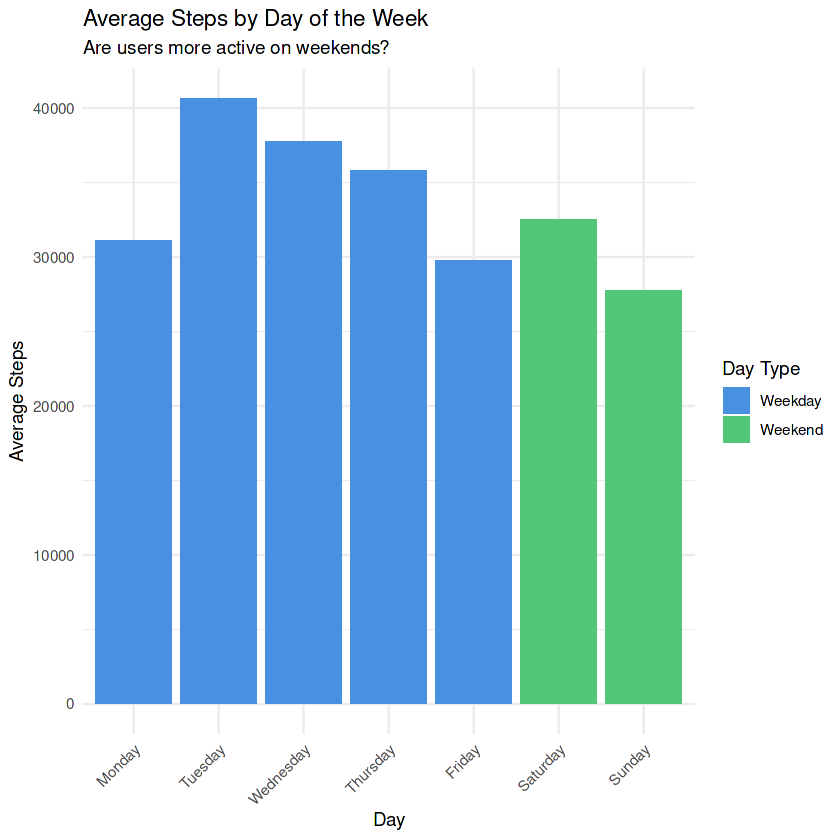

In [8]:
# Average daily steps per user
user_avg_steps <- daily_activity %>% 
  group_by(id) %>% 
  summarise(avg_steps_per_person = mean(total_steps, na.rm = TRUE))

# Daily summary: average steps and calories per day
daily_summary <- merged_data %>%
  group_by(activity_date, day_of_week, day_type) %>%
  summarise(
    avg_steps = mean(total_steps, na.rm = TRUE),
    avg_calories = mean(calories, na.rm = TRUE),
    active_users = n_distinct(id),
    .groups = "drop"
  ) %>%
  mutate(day_of_week = factor(day_of_week, 
                              levels = c("Monday", "Tuesday", "Wednesday", 
                                         "Thursday", "Friday", "Saturday", "Sunday")))

# Bar plot: average steps by day of the week
ggplot(daily_summary, aes(x = day_of_week, y = avg_steps, fill = day_type)) +
  geom_col() +
  scale_fill_manual(values = c("Weekday" = "#4A90E2", "Weekend" = "#50C878")) +
  labs(
    title = "Average Steps by Day of the Week",
    subtitle = "Are users more active on weekends?",
    x = "Day", y = "Average Steps", fill = "Day Type"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### 4.3️⃣ Classify Daily Activity Type
Categorize each user's daily activity into Very Active, Moderate, or Sedentary, and calculate ratios.


In [9]:
# Categorize each day as Very Active, Moderate, or Sedentary
daily_activity <- daily_activity %>% 
  mutate(
    activity_day_type = case_when(
      very_active_minutes > 30 ~ "Very Active",
      sedentary_minutes > 1000 ~ "Sedentary",
      TRUE ~ "Moderate"
    )
  )

# Calculate number of days per activity type per user
user_activity_summary <- daily_activity %>% 
  group_by(id, activity_day_type) %>% 
  summarise(num_of_days = n(), .groups = "drop") %>% 
  pivot_wider(
    names_from = activity_day_type,
    values_from = num_of_days,
    values_fill = 0
  ) %>% 
  mutate(
    total_days_recorded = `Very Active` + Moderate + Sedentary,
    active_day_ratio = ifelse(total_days_recorded >= 5,
                              `Very Active` / total_days_recorded, 
                              NA)
  )


### 4.4️⃣ User Sleep Records
Summarize sleep logging behavior and categorize users by activity level.


In [10]:
# Summarize sleep logging and activity
user_sleep_summary <- merged_data %>% 
  group_by(id) %>% 
  summarise(
    days_logged_sleep = sum(!is.na(total_minutes_asleep)),
    total_days = n(),
    sleep_logging_percent = round(days_logged_sleep / total_days * 100, 2),
    avg_steps = mean(total_steps, na.rm = TRUE)
  ) %>% 
  mutate(
    activity_level = case_when(
      avg_steps <= 5000 ~ "Sedentary",
      avg_steps > 5000 & avg_steps <= 10000 ~ "Moderately Active",
      avg_steps > 10000 ~ "Highly Active"
    )
  )

# Merge activity and sleep summaries
user_profile <- user_activity_summary %>%
  left_join(
    user_sleep_summary %>% select(id, activity_level, sleep_logging_percent),
    by = "id"
  ) %>%
  mutate(
    active_ratio_label = ifelse(is.na(active_day_ratio), 0, round(active_day_ratio, 2)),
    logs_sleep_label = case_when(
      sleep_logging_percent == 0 ~ "Never",
      sleep_logging_percent < 50 ~ "Sometimes",
      TRUE ~ "Regularly"
    )
  )

# Display summary table
cat("\n📈 User Activity vs Sleep Logging Summary:\n")
print(table(user_profile$activity_level, user_profile$logs_sleep_label))



📈 User Activity vs Sleep Logging Summary:


                   
                    Never Regularly Sometimes
  Highly Active         2         3         2
  Moderately Active     6        10         2
  Sedentary             1         2         5


### 4.5️⃣ Scatter Plot: Activity vs Sleep Logging
Visualize the relationship between users' sleep logging consistency and their average daily steps.


Warning message in ggrepel::geom_text_repel(data = filter(user_sleep_summary, id %in% :
“Ignoring unknown parameters: `segment.linewidth`”


`geom_smooth()` using formula = 'y ~ x'


Warning message:
“The following aesthetics were dropped during statistical transformation: alpha
and label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


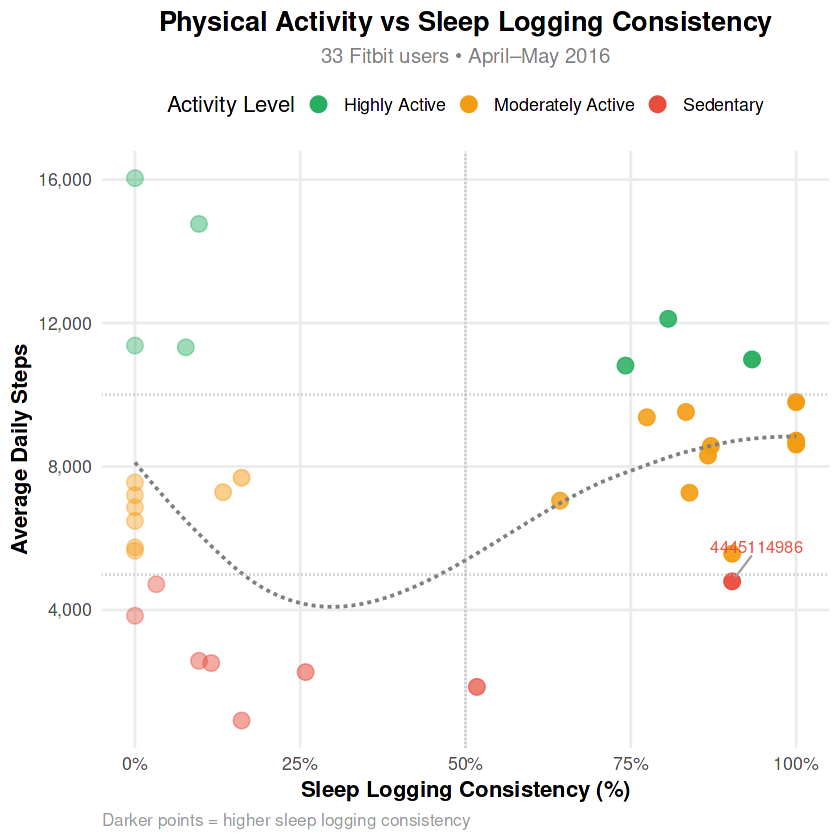

In [11]:
# Create the main scatter plot
p <- ggplot(user_sleep_summary, aes(
  x = sleep_logging_percent,
  y = avg_steps,
  color = activity_level,
  alpha = sleep_logging_percent / 100,
  label = as.character(id)
)) +
  geom_point(size = 4) +
  geom_smooth(method = "loess", se = FALSE, linetype = "dashed", color = "gray50", linewidth = 0.8) +
  ggrepel::geom_text_repel(
    data = filter(user_sleep_summary, id %in% c(33, 20, 6, 14, 4445114986)),
    size = 3.4,
    box.padding = 1.1,
    point.padding = 0.4,
    segment.color = "gray60",
    segment.linewidth = 0.4
  ) +
  scale_color_manual(
    name = "Activity Level",
    values = c(
      "Sedentary" = "#E74C3C",
      "Moderately Active" = "#F39C12",
      "Highly Active" = "#27AE60"
    )
  ) +
  scale_alpha_continuous(range = c(0.4, 1), guide = "none") +
  labs(
    title = "Physical Activity vs Sleep Logging Consistency",
    subtitle = "33 Fitbit users • April–May 2016",
    x = "Sleep Logging Consistency (%)",
    y = "Average Daily Steps",
    caption = "Darker points = higher sleep logging consistency"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 16),
    plot.subtitle = element_text(hjust = 0.5, color = "gray50", size = 12),
    plot.caption = element_text(color = "gray60", size = 10, hjust = 0),
    legend.position = "top",
    panel.grid.minor = element_blank(),
    axis.title = element_text(face = "bold")
  ) +
  geom_vline(xintercept = 50, linetype = "dotted", color = "gray70", linewidth = 0.6) +
  geom_hline(yintercept = c(5000, 10000), linetype = "dotted", color = "gray70", linewidth = 0.6) +
  scale_x_continuous(breaks = c(0, 25, 50, 75, 100), labels = scales::percent_format(scale = 1)) +
  scale_y_continuous(labels = scales::comma)

print(p)


### 4.6️⃣ Hourly Steps Analysis
Analyze average steps per hour to identify daily activity patterns across all users.


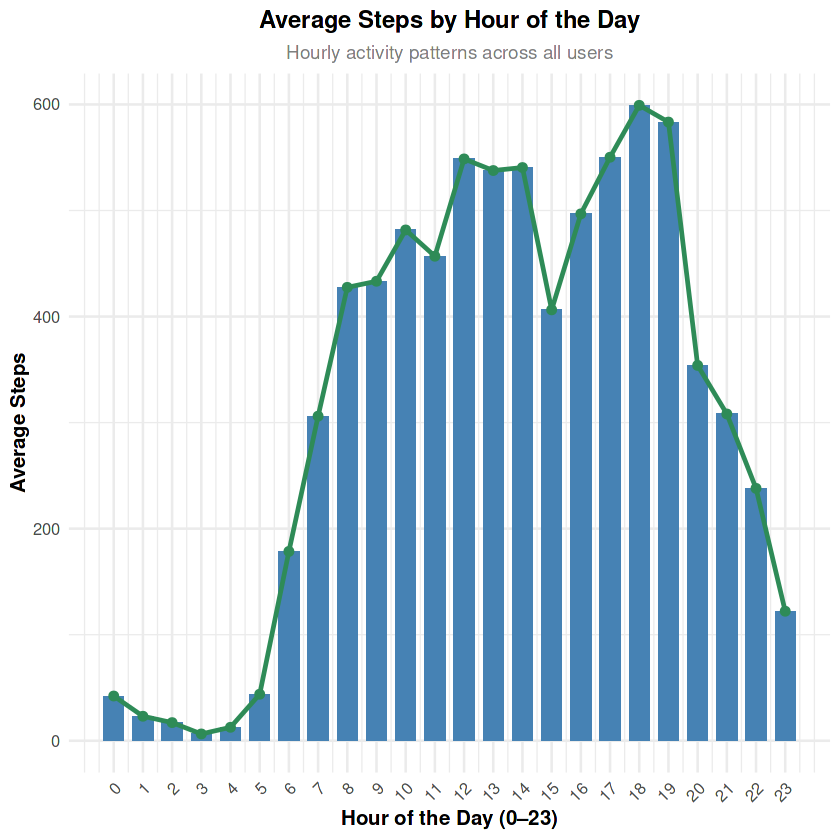

In [12]:
avg_steps_per_hour <- hourly_steps %>%
  group_by(hour_numeric) %>%
  summarise(avg_steps = mean(step_total, na.rm = TRUE))

ggplot(avg_steps_per_hour, aes(x = hour_numeric, y = avg_steps)) +
  geom_col(fill = "#4682B4", width = 0.7) +
  geom_line(aes(y = avg_steps), color = "#2E8B57", size = 1) +
  geom_point(aes(y = avg_steps), color = "#2E8B57", size = 2) +
  labs(
    title = "Average Steps by Hour of the Day",
    subtitle = "Hourly activity patterns across all users",
    x = "Hour of the Day (0–23)",
    y = "Average Steps"
  ) +
  scale_x_continuous(breaks = 0:23) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5, color = "gray50", size = 11),
    axis.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

# Ensure plots directory exists
if(!dir.exists("plots")) dir.create("plots")


## 5️⃣ Share

### 📊 Visualization Overview

- **User Engagement** → Bar chart showing number of recorded days per user  
- **Weekday vs Weekend Steps** → Grouped bar chart showing average steps by day of week  
- **Activity vs Sleep Logging** → Scatter plot showing correlation between activity level and sleep logging  
- **Hourly Steps Analysis** → Line/Bar chart showing Average Steps by Hour of the Day  

These visuals summarize behavioral patterns and help communicate key insights effectively to non-technical stakeholders.

## 6️⃣ Act

### 💡 Strategic Recommendations
1. **Increase User Engagement:**  
   Introduce progress tracking, reminders, or daily streak rewards.  
2. **Leverage Weekend Motivation:**  
   Run special campaigns or in-app challenges on weekends.  
3. **Integrate Sleep–Activity Features:**  
   Provide insights connecting physical activity to sleep quality.  
4. **Optimize Notification Timing:**  
   Schedule prompts during morning and evening activity peaks.  
5. **Collect Updated Data:**  
   Encourage continuous user data collection for deeper personalization.

---

📅 **Period Analyzed:** April 12 – May 12, 2016  
👩‍💻 **Tool Used:** R  
📈 **Dataset:** Fitbit Fitness Tracker (Public Domain)  
🎓 **Project Type:** Practice Project (Google Data Analytics Capstone)  
🏢 **Company Context:** Bellabeat – Smart Wellness Technology for Women
